In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.font_manager import FontProperties
import pyscisci.all as pyscisci
from brokenaxes import brokenaxes
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from scipy.stats import norm, ks_2samp
from collections import defaultdict
from scipy import stats
from scipy.stats import norm, ks_2samp
from adjustText import adjust_text

EF = FontProperties(family = 'Arial')

%matplotlib inline

In [2]:
Distribution = r' '
Distdf = pd.read_csv(Distribution)
del Distdf['Unnamed: 0']
print(Distdf .shape)
Distdf .columns

(1509324, 6)


Index(['work_id', 'author_position', 'author_id', 'institution_id', 'Journal',
       'country_code'],
      dtype='object')

In [5]:
PNASdf = Distdf[Distdf['Journal']=='Proceedings of the National Academy of Sciences']
print(PNASdf .shape)

(678708, 6)


In [ ]:
authordistribution = PNASdf[['work_id','author_position','author_id']]
firstauthordistribution = authordistribution[authordistribution['author_position']=='first']
print(firstauthordistribution .shape)

numpub_first_author = firstauthordistribution .groupby(['author_id'])['work_id'].nunique().reset_index()
numpub_first_author = numpub_first_author .rename(columns = {'work_id':'numpub'})
numpub_first_author = numpub_first_author.sort_values(by = ['numpub'], ascending = False)
numpub_first_author['Rank'] = numpub_first_author['numpub'].rank(ascending = False, method='min')
numpub_first_author .head(3)

(123299, 3)


,author_id,numpub,Rank
87811,https://openalex.org/A5103636186,119,1.0
21458,https://openalex.org/A5024388142,84,2.0
94605,https://openalex.org/A5111535765,80,3.0


In [7]:
allauthordistribution = authordistribution[['work_id','author_id']]
print(allauthordistribution .shape)

numpub_all_author = allauthordistribution .groupby(['author_id'])['work_id'].nunique().reset_index()
numpub_all_author = numpub_all_author .rename(columns = {'work_id':'numpub'})
numpub_all_author = numpub_all_author .sort_values(by = ['numpub'], ascending = False)
numpub_all_author['Rank'] = numpub_all_author['numpub'].rank(ascending = False, method='min')
numpub_all_author .head(3)

(678708, 2)


,author_id,numpub,Rank
178100,https://openalex.org/A5052825834,156,1.0
269217,https://openalex.org/A5079700663,143,2.0
135381,https://openalex.org/A5040129865,135,3.0


In [8]:
instdistribution = PNASdf[['work_id','author_position','institution_id']]

firstinstdistribution = instdistribution[instdistribution['author_position']=='first']

print(firstinstdistribution .shape)

numpub_first_inst = firstinstdistribution .groupby(['institution_id'])['work_id'].nunique().reset_index()
numpub_first_inst = numpub_first_inst .rename(columns = {'work_id':'numpub'})
numpub_first_inst = numpub_first_inst .sort_values(by = ['numpub'], ascending = False)
numpub_first_inst['Rank'] = numpub_first_inst['numpub'].rank(ascending = False, method='min')
numpub_first_inst .head(3)

(123299, 3)


,institution_id,numpub,Rank
845,https://openalex.org/I136199984,3728,1.0
6396,https://openalex.org/I97018004,2331,2.0
2520,https://openalex.org/I32971472,1967,3.0


In [9]:
allinstdistribution = instdistribution[['work_id','institution_id']]
print(allinstdistribution .shape)

numpub_all_inst = allinstdistribution .groupby(['institution_id'])['work_id'].nunique().reset_index()
numpub_all_inst = numpub_all_inst .rename(columns = {'work_id':'numpub'})
numpub_all_inst = numpub_all_inst .sort_values(by = ['numpub'], ascending = False)
numpub_all_inst['Rank'] = numpub_all_inst['numpub'].rank(ascending = False, method='min')
numpub_all_inst .head(3)

(678708, 2)


,institution_id,numpub,Rank
1295,https://openalex.org/I136199984,5785,1.0
11782,https://openalex.org/I97018004,3437,2.0
1258,https://openalex.org/I1344073410,3277,3.0


In [10]:
coundistribution = PNASdf[['work_id','author_position','country_code']]

firstcoundistribution = coundistribution[coundistribution['author_position']=='first']

print(firstcoundistribution .shape)

numpub_first_coun = firstcoundistribution .groupby(['country_code'])['work_id'].nunique().reset_index()
numpub_first_coun = numpub_first_coun .rename(columns = {'work_id':'numpub'})
numpub_first_coun = numpub_first_coun .sort_values(by = ['numpub'], ascending = False)
numpub_first_coun['Rank'] = numpub_first_coun['numpub'].rank(ascending = False, method='min')
numpub_first_coun .head(3)

(123299, 3)


,country_code,numpub,Rank
107,US,81807,1.0
37,GB,5492,2.0
27,DE,5036,3.0


In [11]:
allcoundistribution = coundistribution[['work_id','country_code']]
print(allcoundistribution .shape)

numpub_all_coun = allcoundistribution .groupby(['country_code'])['work_id'].nunique().reset_index()
numpub_all_coun = numpub_all_coun .rename(columns = {'work_id':'numpub'})
numpub_all_coun = numpub_all_coun .sort_values(by = ['numpub'], ascending = False)
numpub_all_coun['Rank'] = numpub_all_coun['numpub'].rank(ascending = False, method='min')
numpub_all_coun .head(3)

(678708, 2)


,country_code,numpub,Rank
155,US,91345,1.0
52,GB,8832,2.0
37,DE,8008,3.0


R2 0.9977776677911719 slope -0.4927410290009903 p_value 0.0
R2 0.9624758214382704 slope -1.545710564339793 p_value 0.0
R2 0.9361207387376737 slope -2.7337706180775108 p_value 3.889074452381936e-68
R2 0.9797022049316114 slope -0.72670369604231 p_value 0.0
R2 0.959874864017747 slope -1.5540581591538325 p_value 0.0
R2 0.9382073658133503 slope -2.61463763366002 p_value 1.8629421753519593e-100


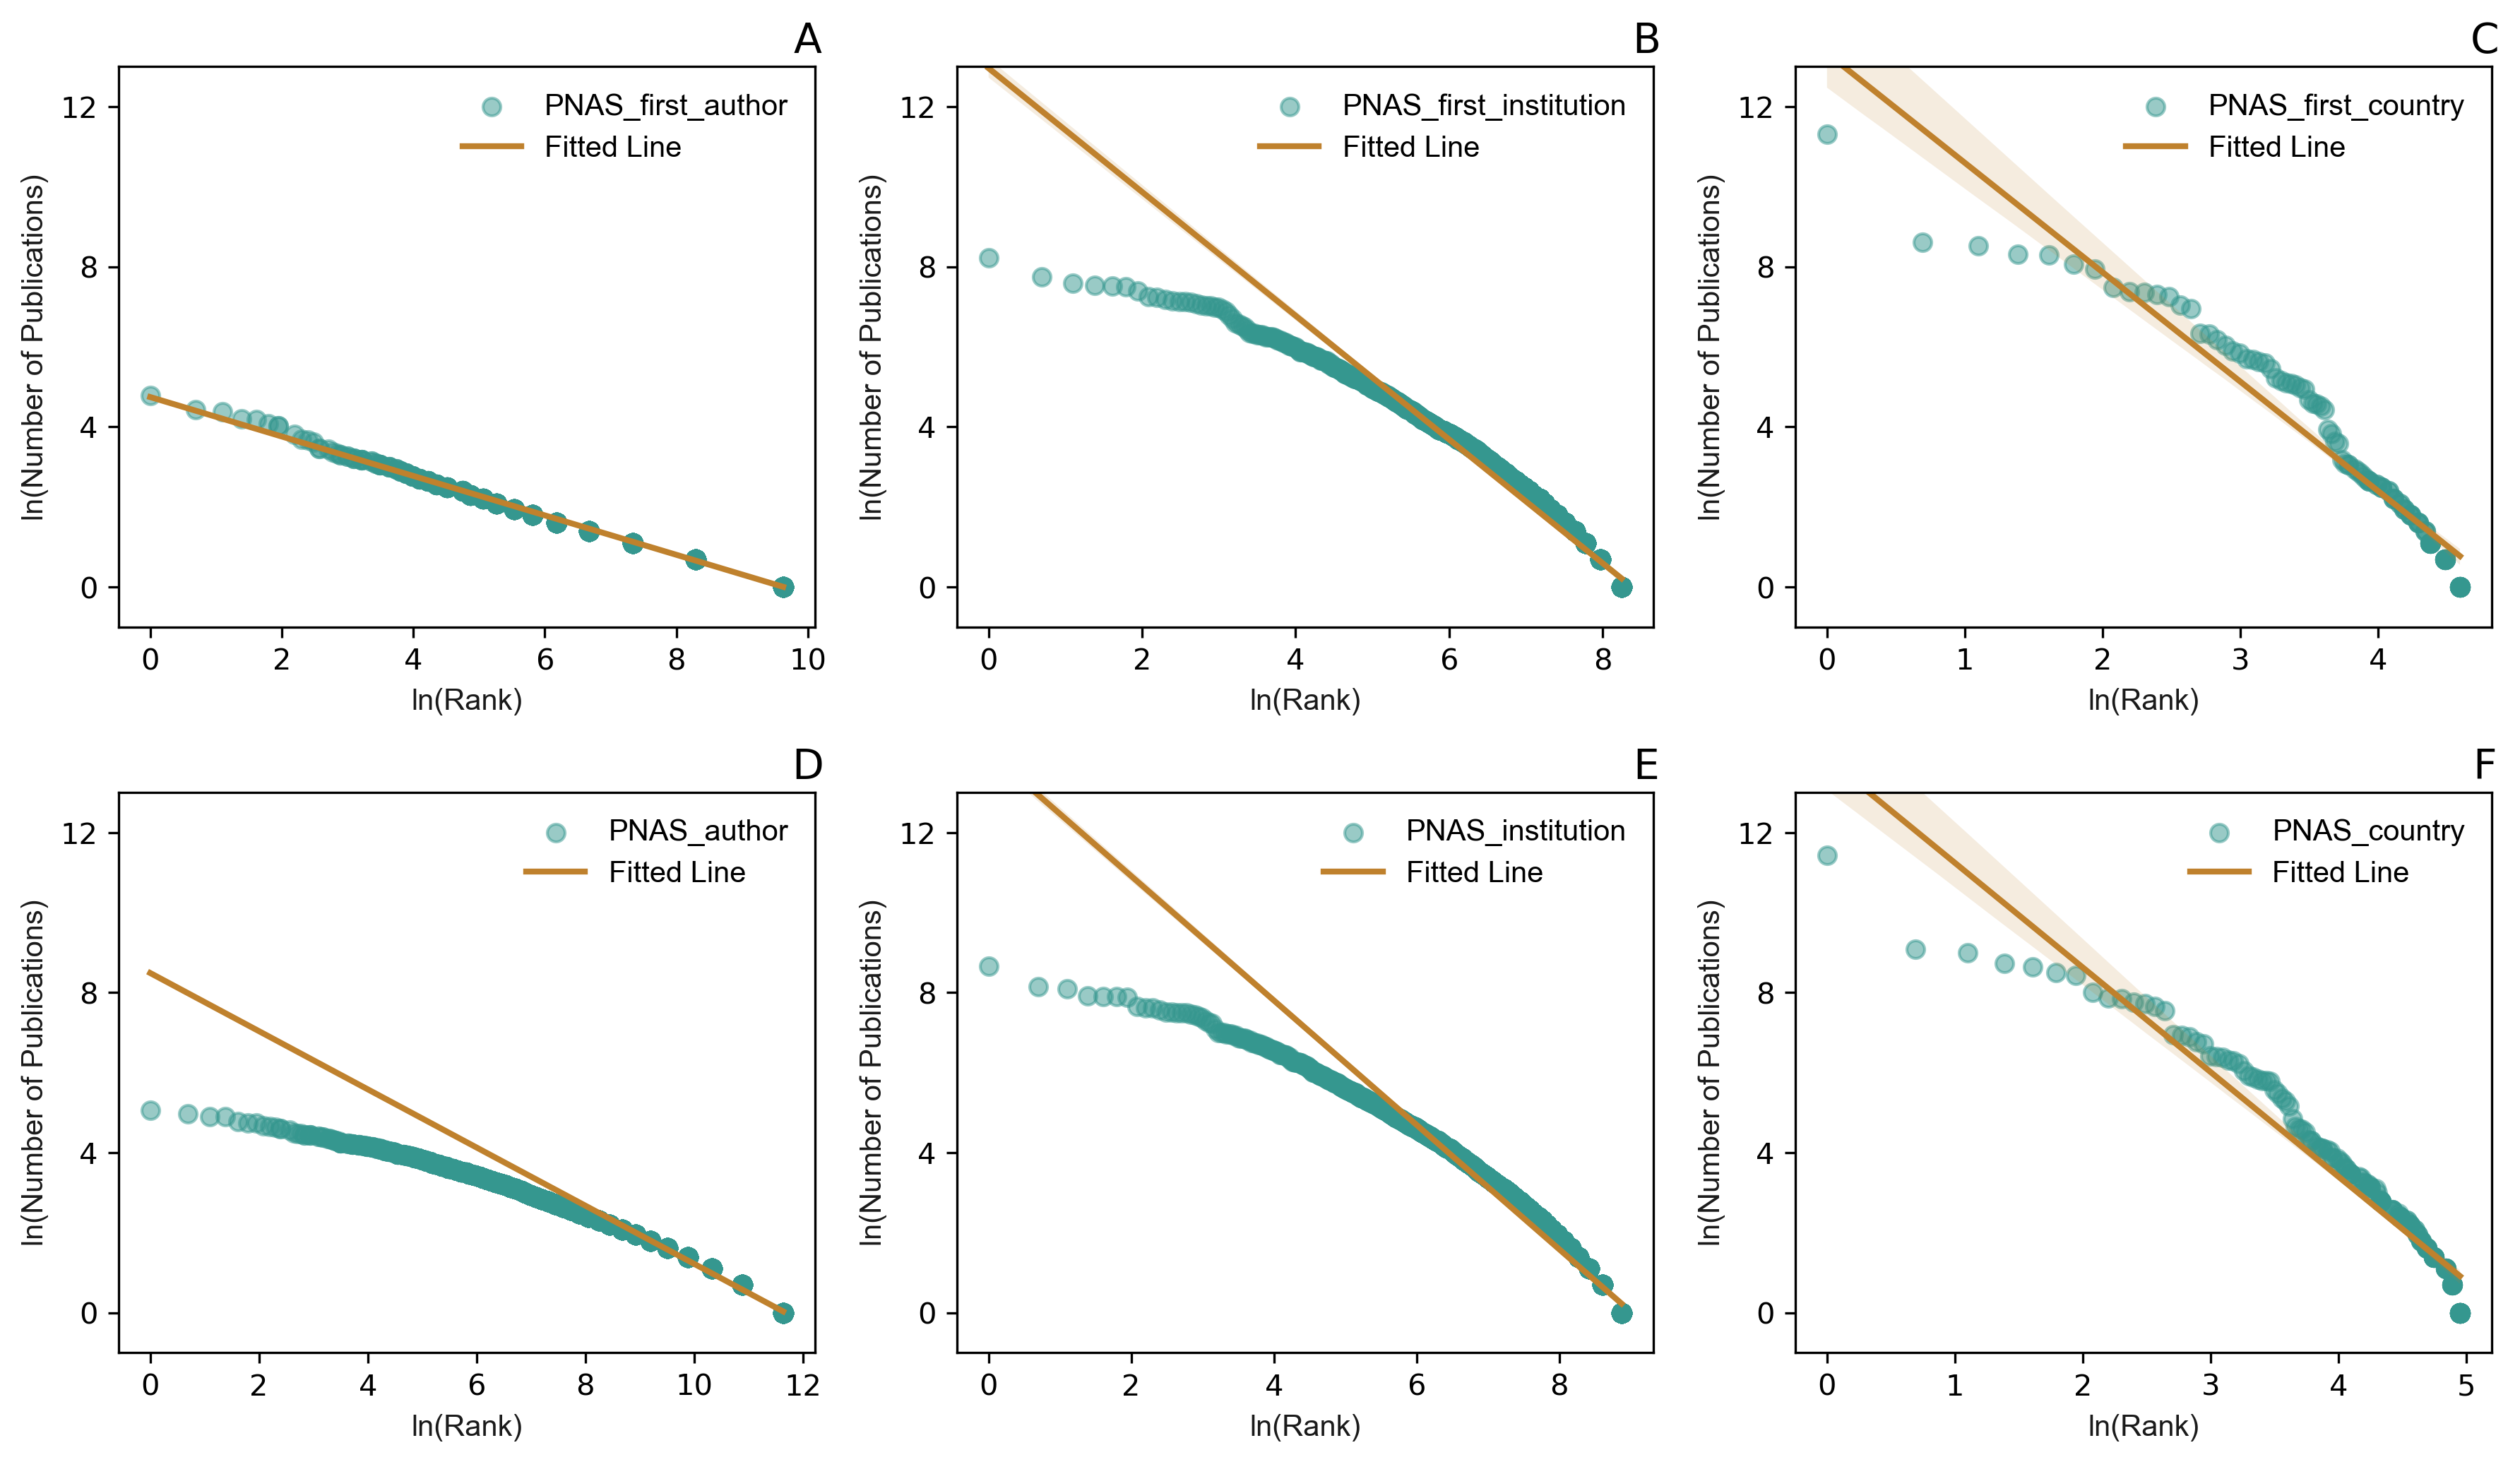

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (12, 7), dpi = 300)

df00 = numpub_first_author
df00['log_rank'] = np.log(df00['Rank'])
df00['log_numpub'] = np.log(df00['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df00['log_rank'], df00['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df00['log_rank'] + intercept
axes[0,0].scatter(df00['log_rank'], df00['log_numpub'], color='#35978f', alpha=0.5, label='PNAS_first_author')
sns.regplot(data=df00, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#bf812d', 'lw': 2}, ci=95, ax=axes[0,0], label='Fitted Line')
axes[0,0].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,0].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,0].set_ylim(-1, 13)
axes[0,0].yaxis.set_major_locator(MultipleLocator(4))
axes[0,0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df01 = numpub_first_inst
df01['log_rank'] = np.log(df01['Rank'])
df01['log_numpub'] = np.log(df01['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df01['log_rank'], df01['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df01['log_rank'] + intercept
axes[0,1].scatter(df01['log_rank'], df01['log_numpub'], color='#35978f', alpha=0.5, label='PNAS_first_institution')
sns.regplot(data=df01, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#bf812d', 'lw': 2}, ci=95, ax=axes[0,1], label='Fitted Line')
axes[0,1].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,1].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,1].set_ylim(-1, 13)
axes[0,1].yaxis.set_major_locator(MultipleLocator(4))
axes[0,1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df02 = numpub_first_coun
df02['log_rank'] = np.log(df02['Rank'])
df02['log_numpub'] = np.log(df02['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df02['log_rank'], df02['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df02['log_rank'] + intercept
axes[0,2].scatter(df02['log_rank'], df02['log_numpub'], color='#35978f', alpha=0.5, label='PNAS_first_country')
sns.regplot(data=df02, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#bf812d', 'lw': 2}, ci=95, ax=axes[0,2], label='Fitted Line')
axes[0,2].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,2].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,2].set_ylim(-1, 13)
axes[0,2].yaxis.set_major_locator(MultipleLocator(4))
axes[0,2].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df10 = numpub_all_author
df10['log_rank'] = np.log(df10['Rank'])
df10['log_numpub'] = np.log(df10['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df10['log_rank'], df10['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df10['log_rank'] + intercept
axes[1,0].scatter(df10['log_rank'], df10['log_numpub'], color='#35978f', alpha=0.5, label='PNAS_author')
sns.regplot(data=df10, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#bf812d', 'lw': 2}, ci=95, ax=axes[1,0], label='Fitted Line')
axes[1,0].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,0].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,0].set_ylim(-1, 13)
axes[1,0].yaxis.set_major_locator(MultipleLocator(4))
axes[1,0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df11 = numpub_all_inst
df11['log_rank'] = np.log(df11['Rank'])
df11['log_numpub'] = np.log(df11['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df11['log_rank'], df11['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df11['log_rank'] + intercept
axes[1,1].scatter(df11['log_rank'], df11['log_numpub'], color='#35978f', alpha=0.5, label='PNAS_institution')
sns.regplot(data=df11, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#bf812d', 'lw': 2}, ci=95, ax=axes[1,1], label='Fitted Line')
axes[1,1].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,1].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,1].set_ylim(-1, 13)
axes[1,1].yaxis.set_major_locator(MultipleLocator(4))
axes[1,1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df12 = numpub_all_coun
df12['log_rank'] = np.log(df12['Rank'])
df12['log_numpub'] = np.log(df12['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df12['log_rank'], df12['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df12['log_rank'] + intercept
axes[1,2].scatter(df12['log_rank'], df12['log_numpub'], color='#35978f', alpha=0.5, label='PNAS_country')
sns.regplot(data=df12, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#bf812d', 'lw': 2}, ci=95, ax=axes[1,2], label='Fitted Line')
axes[1,2].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,2].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,2].set_ylim(-1, 13)
axes[1,2].yaxis.set_major_locator(MultipleLocator(4))
axes[1,2].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

for i, ax in enumerate(axes.flat):
    ax.text(0.99, 1.01, chr(65 + i), transform=ax.transAxes, 
            fontsize=14, verticalalignment='bottom', horizontalalignment='center')

plt.tight_layout()
plt.savefig(r' ')
plt.show()